In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"
pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)

{'trained_betas'} was not found in config. Values will be initialized to default values.


In [3]:
# pipe?

In [55]:
prompt = "portrait of a mythical elf, fashion photoshoot, hyperrealistic, intricate details"

H = 640
W = 512
NIS = 100
GS = 15

  0%|          | 0/101 [00:00<?, ?it/s]

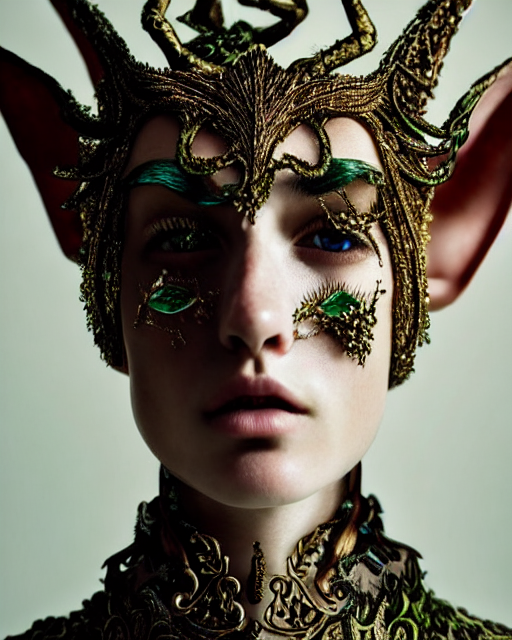

In [56]:
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=GS, height=H, width=W, num_inference_steps=NIS)["sample"][0]
    
image

In [32]:
lbl = "eyes_ysl2"

image.save("images_out/elves/{}.png".format(lbl))

----

In [57]:
empty_array = np.array([None] * 5)

images_out = empty_array.copy()

for i in range(5):
    images_out[i] = empty_array.copy()
    
    for j in range(5):
        
        with autocast("cuda"):
            image = pipe(prompt, guidance_scale=GS, height=H, width=W, num_inference_steps=NIS)["sample"][0]
            
        images_out[i][j] = image

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

portrait of a mythical elf, fashion photoshoot, hyperrealistic, intricate details


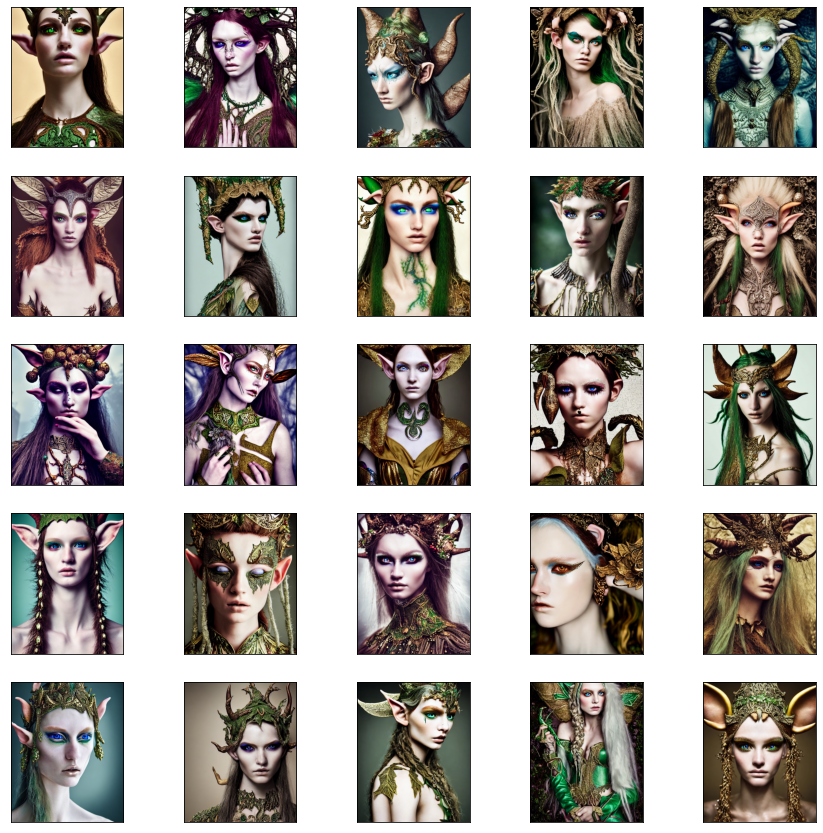

In [58]:
# create subplots grid
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# iterate over all subplots and images_out
for ax_row, im_row in zip(axes, images_out):
    for ax, im in zip(ax_row, im_row):
        # plot image
        ax.imshow(np.array(im))
        # remove ticks
        ax.set_xticks([])
        ax.set_yticks([])

print(prompt)        
plt.show()

In [68]:
images_out[1][4].save("images_out/elves/{}.png".format("my_img3"))

-----